## 루브릭
1. 자기만의 카메라앱 기능 구현을 완수하였다.
얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.  
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.


## 사진 형태에 따른 결과

* 옆모습 사진의 경우 얼굴 모양 디텍팅이 안됨 (dlib.get_frontal_face_detector 작동x)
* 얼굴이 반만 있는 사진도 얼굴 모양 디텍x, 좌표도 생성x

* 얼굴 각도에 따라 바라보는 방향의 각도를 기준으로 선형 변환 피료
* 멀리서 촬영하면 얼굴영역 검출시 픽셀의 벡터값을 통해 검출하는데 그 영역이 너무 작아서 얼굴영역이 검출되지 않을 수 있다
* 사진이 아니라 영상에서 영역을 검출하려는 경우, 바로바로 계산해서 영역검출이 필요해지므로 실행속도가 중요해진다
* 스티커앱의 경우 추출실패하는 경우 위험이 크진 않아 정확도가 낮을때 발생하는 위험은 없으나, 정확도가 높아야 원활한 스티커앱 구동이 가능해진다


In [410]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


In [411]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


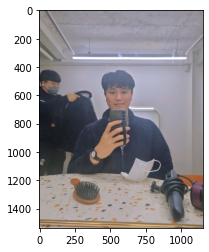

In [412]:
my_image_path = 'self_image4.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

In [413]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [414]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print(dlib_rects ) # 얼굴 영역 디텍팅

rectangles[[(469, 531) (655, 717)]]


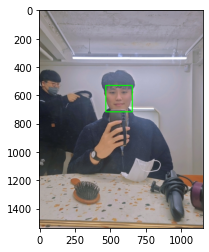

In [415]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA)
     # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
img_show_rgb =  img_show
    #dlib.rectangle 변수 left(), top(), right(), bottom(), 색, 굵기
plt.imshow(img_show_rgb)
plt.show()

In [416]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [417]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  # 이미지값, 얼굴영역 좌표(사각형)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [418]:
print(points.parts())
p = points.parts()
p[0]

points[(467, 582), (469, 605), (473, 628), (477, 651), (485, 672), (499, 690), (518, 703), (540, 713), (564, 715), (587, 713), (608, 703), (624, 687), (637, 669), (645, 647), (648, 623), (650, 600), (651, 576), (486, 565), (497, 555), (512, 552), (527, 553), (542, 558), (572, 556), (587, 550), (603, 548), (618, 550), (630, 559), (558, 578), (558, 593), (559, 608), (560, 624), (543, 638), (551, 639), (560, 641), (569, 638), (577, 636), (503, 583), (513, 579), (524, 579), (534, 584), (523, 586), (512, 586), (582, 583), (591, 577), (602, 577), (612, 580), (603, 584), (592, 585), (525, 665), (539, 660), (552, 656), (561, 658), (571, 655), (583, 657), (598, 660), (585, 671), (573, 676), (563, 677), (553, 677), (540, 674), (531, 666), (552, 665), (562, 666), (571, 664), (593, 662), (572, 664), (562, 666), (553, 666)]


point(467, 582)

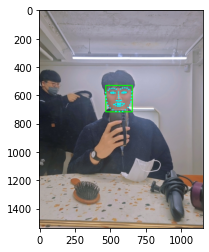

In [419]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1) 
        # 이미지, 점좌표, 크기, 색, 내부 채우기여부

plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

(560, 641)
(x,y) : (560,641)
(w,h) : (187,187)


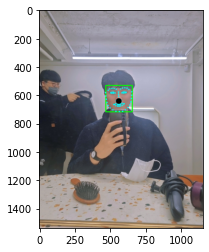

In [420]:
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 인중 근처의 index는 33 입니다
    x = landmark[33][0] # 사각영역기준 x값
    y = landmark[33][1] # 사각영역 기준 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    cv2.circle(img_show, (x,y), 20, (0, 0, 0), -1)

plt.imshow(img_show_rgb)
plt.show()

In [421]:
sticker_path = '24674.png' # 고양이 스티커 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 미지의 차원 확인

(187, 187, 3)


In [422]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
#x,y 특정 부위 지점  / w,h 얼굴영역의 너비 높이
refined_x = x -w//2
refined_y = y -h//2
print (f'(x,y) : ({refined_x},{refined_y})')

#그림이 시작될 refined된 x,y 좌표 설정

(x,y) : (467,548)


In [423]:
# 붙일 스티커가 좌표가 영역밖에서 시작하는 경우에 사용하는 부분

"""# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]   # refined_x의 크기만큼  x값 자르기
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]# refined_y의 크기만큼  y값 자르기
    refined_y = 0
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
    융
    
print (f'(x,y) : ({refined_x},{refined_y})')"""

"# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)\nif refined_x < 0: \n    img_sticker = img_sticker[:, -refined_x:]   # refined_x의 크기만큼  x값 자르기\n    refined_x = 0\n# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정\nif refined_y < 0:\n    img_sticker = img_sticker[-refined_y:, :]# refined_y의 크기만큼  y값 자르기\n    refined_y = 0\n# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)\n    융\n    \nprint (f'(x,y) : ({refined_x},{refined_y})')"

In [424]:
print(refined_x)
print(img_sticker.shape)

467
(187, 187, 3)


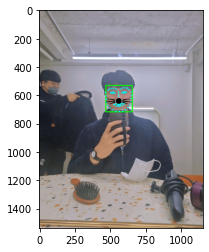

In [425]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], 
                        # 기준좌표 + 스티커 너비
                        refined_x:refined_x+img_sticker.shape[1]]
                         # 기준좌표 + 스티커 높이
    
                        
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.

img_show[refined_y:refined_y +img_sticker.shape[0], 
         refined_x:refined_x+img_sticker.shape[1]]  =\
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
# img_sticker!=0 : 이미지에서 색 없는 부분만 사용(검정부분)
# np.where(조건,조건충족시 출력내용, 충족하지 않을때 출력내용)
plt.imshow(img_show)
plt.show()

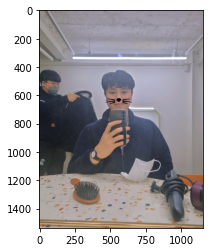

In [426]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
#np.where(조건,조건충족시 출력내용, 충족하지 않을때 출력내용)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()